In [2]:
import mlc_func
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [5]:
def create_target_file(baseline, reference, output, offset = 0):
    targets = np.genfromtxt(reference, delimiter = ',') -\
        np.genfromtxt(baseline, delimiter = ',') - offset
    pd.DataFrame(targets).to_csv(output, index = None, header = None)

In [10]:
basepath_feat = '../../ElF/data/BH/qz_custom/elfs/basis_old_elf/'
basepath_tar = '../../ElF/data/BH/qz_custom/'
systems = ['trimers','dimers','monomers']
mono_offset = 469.79981032859143
n_mol = [3,2,1]
for s,nm in zip(systems, n_mol):
    create_target_file(basepath_tar +'/{}/energies.dat'.format(s),
                      '../../ElF/data/MB-pol/{}/energies.dat'.format(s),
                      basepath_tar +'/{}/energies_bh_mbpol.dat'.format(s), mono_offset*nm)
        
feature_src = [basepath_feat + s +'_processed.hdf5' for s in systems]
target_src = [basepath_tar +'/' + s +'/energies_bh_mbpol.dat' for s in systems]
# filters = [np.genfromtxt('../publication/data/filters/{}.filter'.format(s), dtype =bool) for s in systems]
nn, masks = mlc_func.ml.build_energy_mlcf(feature_src, target_src, automask_std = 1e-3, filters = filters)


{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
(1500, 3, 15)
(1500, 6, 6)
{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


KeyboardInterrupt: 

In [32]:
nn.train(step_size=0.001, max_steps= 80001 ,b_=[1e-8, 1e-8], multiplier=[1,1,1])

multipliers: [1, 1, 1]
Step: 0
Training set loss:
0: 9.004117965698242
1: 5.977287769317627
2: 2.9872241020202637
Total: 11.212742805480957
Validation set loss:
0: 8.997138977050781
1: 5.984710216522217
2: 2.9782872200012207
Total: 11.208722114562988
--------------------
L2-loss: 1.7370418845530367e-06
Step: 8000
Training set loss:
0: 0.016570614650845528
1: 0.018106210976839066
2: 0.00575016625225544
Total: 0.025208819657564163
Validation set loss:
0: 0.016019627451896667
1: 0.01931552030146122
2: 0.006470069754868746
Total: 0.02591485157608986
--------------------
L2-loss: 1.7286561160290148e-06
Step: 16000
Training set loss:
0: 0.010208130814135075
1: 0.01088077574968338
2: 0.0032990234903991222
Total: 0.01528007723391056
Validation set loss:
0: 0.010984038934111595
1: 0.013067766092717648
2: 0.0023936510551720858
Total: 0.01723789982497692
--------------------
L2-loss: 1.7534944163344335e-06
Step: 24000
Training set loss:
0: 0.009424017742276192
1: 0.009754534810781479
2: 0.0028030

KeyboardInterrupt: 

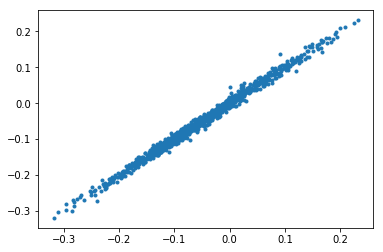

In [33]:
plot(nn.get_logits(which='train')[0], nn.subnets[0][0].y_train, ls = '', marker = '.')

In [88]:
nn = mlc_func.load_network('../publication/models/bh_qz_to_mbp_offset/')

scale_together
INFO:tensorflow:Restoring parameters from ../publication/models/bh_qz_to_mbp_offset/model.ckpt


In [98]:
len(nn.subnets[2][2].y_test)

153

===========trimers===========
RMSE: 3.24 (28.54)
MAX: 18.96 (90.33)
MAE: 2.40 (22.36)
===========dimers===========
RMSE: 4.22 (40.04)
MAX: 19.62 (169.30)
MAE: 2.93 (30.89)
===========monomers===========
RMSE: 3.59 (53.70)
MAX: 39.07 (148.73)
MAE: 1.43 (42.59)


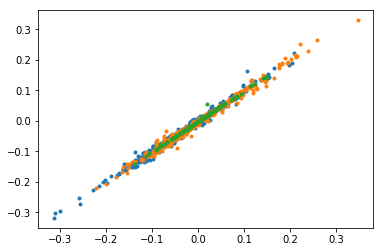

In [34]:
n_mol_dict = {'monomers' : 1, 'dimers': 2,'trimers': 3}
for i in range(3):
    plot(nn.get_logits(which='test')[i], nn.subnets[i][0].y_test, ls = '', marker = '.')
    dev = (nn.get_logits(which='test')[i] - nn.subnets[i][0].y_test)/n_mol_dict[systems[i]]*1000
    dev_bh = nn.subnets[i][0].y_test/n_mol_dict[systems[i]]*1000
    dev -= np.mean(dev)
    dev_bh -= np.mean(dev_bh)
    print('==========={}==========='.format(systems[i]))
    print('RMSE: {:3.2f} ({:3.2f})'.format(np.std(dev),np.std(dev_bh)))
    print('MAX: {:3.2f} ({:3.2f})'.format(np.max(np.abs(dev)),np.max(np.abs(dev_bh))))
    print('MAE: {:3.2f} ({:3.2f})'.format(np.mean(np.abs(dev)),np.mean(np.abs(dev_bh))))

===========trimers===========
0.008808718640529851
0.037323005282587474
0.006818237280072026
===========dimers===========
0.008306576907318224
0.05942069737375277
0.005584153677792279
===========monomers===========
0.0029831574600494106
0.023696675453606986
0.0019806751549194487


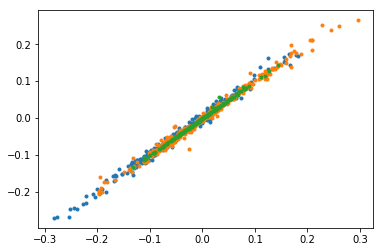

In [8]:
for i in range(3):
    
    plot(nn.get_logits(which='test')[i], nn.subnets[i][0].y_test, ls = '', marker = '.')
    print('==========={}==========='.format(systems[i]))
    print(np.sqrt(np.mean((nn.get_logits(which='test')[i] - nn.subnets[i][0].y_test)**2)))
    print(np.max(np.abs(nn.get_logits(which='test')[i] - nn.subnets[i][0].y_test)))
    print(np.mean(np.abs(nn.get_logits(which='test')[i] - nn.subnets[i][0].y_test)))

In [35]:
nn.save_all('../publication/models/bh_qz_to_mbp_elf', override=False)

In [36]:
import pickle

In [37]:
pickle.dump(masks, open('../publication/models/bh_qz_to_mbp_elf/masks', 'wb'))

In [ ]:
os.